In [1]:
import pandas as pd
import numpy as np
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import matplotlib.pyplot as plt
import os

# Loading the dataset using a relative path
path_to_save = os.getcwd()+'/Hw3_MA_AghinyanLusine/telco.csv'
data = pd.read_csv(path_to_save ) 


In [2]:

# Displaying the first few rows of the dataframe
data.head()


,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [3]:
#Checking column names to understand what data is available
data.columns

Index(['ID', 'region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn'],
      dtype='object')

In [4]:
# Checking for missing values
print(data.isnull().sum())


ID          0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
retire      0
gender      0
voice       0
internet    0
forward     0
custcat     0
churn       0
dtype: int64


In [5]:

# Converting categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

In [6]:
data.head()

,ID,tenure,age,address,income,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,...,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes
0,1,13,44,9,64,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,2,11,33,7,136,False,True,False,False,False,...,False,False,True,True,False,True,False,False,True,True
2,3,68,52,24,116,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,4,33,33,12,33,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,5,23,30,9,30,True,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False


In [7]:
data.columns

Index(['ID', 'tenure', 'age', 'address', 'income', 'region_Zone 2',
       'region_Zone 3', 'marital_Unmarried', 'ed_Did not complete high school',
       'ed_High school degree', 'ed_Post-undergraduate degree',
       'ed_Some college', 'retire_Yes', 'gender_Male', 'voice_Yes',
       'internet_Yes', 'forward_Yes', 'custcat_E-service',
       'custcat_Plus service', 'custcat_Total service', 'churn_Yes'],
      dtype='object')

In [8]:

# Checking data types
print(data.dtypes)

ID                                 int64
tenure                             int64
age                                int64
address                            int64
income                             int64
region_Zone 2                       bool
region_Zone 3                       bool
marital_Unmarried                   bool
ed_Did not complete high school     bool
ed_High school degree               bool
ed_Post-undergraduate degree        bool
ed_Some college                     bool
retire_Yes                          bool
gender_Male                         bool
voice_Yes                           bool
internet_Yes                        bool
forward_Yes                         bool
custcat_E-service                   bool
custcat_Plus service                bool
custcat_Total service               bool
churn_Yes                           bool
dtype: object


In [9]:
# Initializing the AFT models
weibull_aft = WeibullAFTFitter()
log_normal_aft = LogNormalAFTFitter()
log_logistic_aft = LogLogisticAFTFitter()


In [10]:
# Defining column and event occurred column 
duration_col = 'tenure'  # Lifetime of the customer
event_col = 'churn_Yes'  # True if customer churned, False otherwise


In [11]:
# Fitting the models
weibull_aft.fit(data, duration_col=duration_col, event_col=event_col)
log_normal_aft.fit(data, duration_col=duration_col, event_col=event_col)
log_logistic_aft.fit(data, duration_col=duration_col, event_col=event_col)

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

In [12]:
# Printing AIC values for each model to compare
print("Weibull AFT AIC:", weibull_aft.AIC_)
print("Log-Normal AFT AIC:", log_normal_aft.AIC_)
print("Log-Logistic AFT AIC:", log_logistic_aft.AIC_)


Weibull AFT AIC: 2958.3571269466456
Log-Normal AFT AIC: 2950.3002131922785
Log-Logistic AFT AIC: 2952.2582596356683


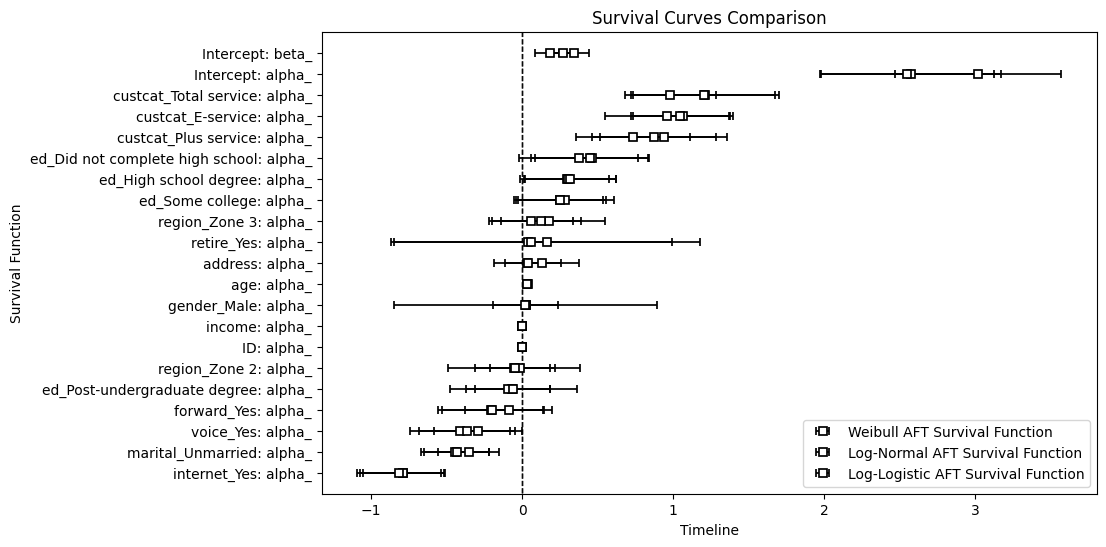

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the survival function for each AFT model
weibull_aft.plot(ax=ax, label='Weibull AFT Survival Function')
log_normal_aft.plot(ax=ax, label='Log-Normal AFT Survival Function')
log_logistic_aft.plot(ax=ax, label='Log-Logistic AFT Survival Function')

plt.title('Survival Curves Comparison')
plt.xlabel('Timeline')
plt.ylabel('Survival Function')
plt.legend()
plt.show()


In [14]:
#Finalizing the Model

In [15]:
final_model = log_normal_aft

In [16]:
# Print the summary attribute of the Log-Normal AFT model
print(final_model.summary)

                                            coef  exp(coef)  se(coef)  \
param  covariate                                                        
mu_    ID                              -0.000474   0.999526  0.000198   
       address                          0.042630   1.043551  0.008880   
       age                              0.033230   1.033788  0.007241   
       custcat_E-service                1.064673   2.899891  0.169648   
       custcat_Plus service             0.937889   2.554584  0.215175   
       custcat_Total service            1.210374   3.354739  0.249688   
       ed_Did not complete high school  0.376412   1.457047  0.200659   
       ed_High school degree            0.306672   1.358895  0.162321   
       ed_Post-undergraduate degree    -0.053980   0.947451  0.222322   
       ed_Some college                  0.285017   1.329785  0.164680   
       forward_Yes                     -0.203822   0.815608  0.179371   
       gender_Male                      0.035347   

In [17]:
from lifelines import LogNormalAFTFitter

# Define significant features based on the updated columns
significant_features = [
    'tenure', 'address', 'age', 
    'custcat_E-service', 'custcat_Plus service', 'custcat_Total service',
    'voice_Yes', 'internet_Yes', 'marital_Unmarried'  # Include 'marital_Unmarried' if significant
]

# Ensure the event column is included
features_to_use = significant_features + ['churn_Yes']

# Fit the model
final_model = LogNormalAFTFitter()
final_model.fit(data[features_to_use], duration_col='tenure', event_col='churn_Yes')

# Print the model summary to review coefficients and significance
print(final_model.summary)


                                  coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                              
mu_    address                0.042824   1.043754  0.008847        0.025483   
       age                    0.036826   1.037512  0.006400        0.024283   
       custcat_E-service      1.025825   2.789395  0.169047        0.694499   
       custcat_Plus service   0.822553   2.276303  0.169425        0.490485   
       custcat_Total service  1.013269   2.754590  0.209579        0.602501   
       internet_Yes          -0.840528   0.431483  0.138259       -1.111511   
       marital_Unmarried     -0.447317   0.639341  0.114472       -0.671679   
       voice_Yes             -0.463493   0.629082  0.166771       -0.790359   
       Intercept              2.534887  12.615010  0.242611        2.059379   
sigma_ Intercept              0.283034   1.327150  0.046020        0.192836   

                              coef upper 95%  exp(c

In [18]:
import numpy as np

# Defining the average monthly revenue (MM) and the annual discount rate (r)
MM = 30  # hypothetical average monthly margin in 
r = 0.05  # annual discount rate, e.g., 5%

# Calculating the discount factor for each month of tenure
data['Discount_Factor'] = (1 + r / 12) ** (-data['tenure'])

# Calculate CLV by multiplying the tenure by monthly margin, then discounting it
data['CLV'] = data['tenure'] * MM * data['Discount_Factor']

# Optionally, you can drop the intermediate 'Discount_Factor' column if no longer needed
data.drop(columns=['Discount_Factor'], inplace=True)

# Output the data to see the CLV and other columns
print(data[['ID', 'tenure', 'CLV']].head())


   ID  tenure          CLV
0   1      13   369.478520
1   2      11   315.246396
2   3      68  1537.572875
3   4      33   863.065519
4   5      23   627.069490


In [19]:

# Calculating average CLV for each customer category based on dummy variable columns
average_clv_by_eservice = data.groupby('custcat_E-service')['CLV'].mean()
average_clv_by_plus_service = data.groupby('custcat_Plus service')['CLV'].mean()
average_clv_by_total_service = data.groupby('custcat_Total service')['CLV'].mean()

print("Average CLV by E-service Category:")
print(average_clv_by_eservice)

print("\nAverage CLV by Plus Service Category:")
print(average_clv_by_plus_service)

print("\nAverage CLV by Total Service Category:")
print(average_clv_by_total_service)


Average CLV by E-service Category:
custcat_E-service
False     825.70323
True     1048.81607
Name: CLV, dtype: float64

Average CLV by Plus Service Category:
custcat_Plus service
False    835.299870
True     973.445232
Name: CLV, dtype: float64

Average CLV by Total Service Category:
custcat_Total service
False    876.527478
True     866.320860
Name: CLV, dtype: float64


In [20]:
# Recreating a consolidated 'custcat' column from dummy variables for consolidated analysis
conditions = [
    data['custcat_E-service'] == 1,
    data['custcat_Plus service'] == 1,
    data['custcat_Total service'] == 1
]
choices = ['E-service', 'Plus service', 'Total service']
data['custcat'] = np.select(conditions, choices, default='Other')

# Now calculate average CLV by the reconstructed 'custcat' column
average_clv_by_custcat = data.groupby('custcat')['CLV'].mean()
print("Average CLV by Customer Category:")
print(average_clv_by_custcat)


Average CLV by Customer Category:
custcat
E-service        1048.816070
Other             633.593218
Plus service      973.445232
Total service     866.320860
Name: CLV, dtype: float64


In [21]:

# Exploring CLV by service usage
average_clv_by_service = data.groupby(['voice_Yes', 'internet_Yes', 'forward_Yes'])['CLV'].mean()
print("Average CLV by Service Usage:", average_clv_by_service)


Average CLV by Service Usage: voice_Yes  internet_Yes  forward_Yes
False      False         False          883.086092
                         True           972.829204
           True          False          758.863864
                         True           739.903746
True       False         False          704.610519
                         True           987.976828
           True          False          792.950864
                         True           831.430660
Name: CLV, dtype: float64


In [22]:
# Calculating average CLV by marital status
# For example, grouping by marital status
average_clv_by_marital = data.groupby('marital_Unmarried')['CLV'].mean()
print("Average CLV by Marital Status:", average_clv_by_marital)

Average CLV by Marital Status: marital_Unmarried
False    949.423292
True     800.305321
Name: CLV, dtype: float64


In [23]:
# Calculating average CLV by retirement status
average_clv_by_retire = data.groupby('retire_Yes')['CLV'].mean()
print("Average CLV by Retirement Status:")
print(average_clv_by_retire)


Average CLV by Retirement Status:
retire_Yes
False     857.462430
True     1211.851501
Name: CLV, dtype: float64


In [24]:
# Calculating average CLV by gender
average_clv_by_gender = data.groupby('gender_Male')['CLV'].mean()
print("Average CLV by Gender:")
print(average_clv_by_gender)


Average CLV by Gender:
gender_Male
False    883.466639
True     864.112761
Name: CLV, dtype: float64
